# Imports

In [2]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
import numpy as np

from keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data with VGG16 model pre-trained on ImageNet

In [ ]:
# Load the pre-trained VGG16 model without the top classification layer
# This model is used for feature extraction from images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to load images and extract features using the VGG16 model
def load_data_extracted_features(data_folder):
    data = []  # To store extracted features
    labels = []  # To store corresponding labels
    for category in os.listdir(data_folder):
        category_path = os.path.join(data_folder, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                # Load and preprocess the image
                image = load_img(img_path, target_size=(32, 32))  # Load image and resize to 32x32
                image = img_to_array(image)  # Convert image to array format
                image = preprocess_input(image)  # Preprocess image for VGG16
                # Extract features using the VGG16 model
                features = model.predict(np.expand_dims(image, axis=0))
                data.append(features.flatten())  # Flatten the extracted features
                labels.append(category)  # Append the corresponding label
    return np.array(data), np.array(labels)

# Load training and testing data with extracted features using the VGG16 model
data_train, labels_train = load_data_extracted_features('C:\\Users\\dovy4\\Desktop\\1000')
data_test, labels_test = load_data_extracted_features('C:\\Users\\dovy4\\Desktop\\test_100')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

# Function to load images and extract features basic without VGG16

In [ ]:
# Function to load images without feature extraction (using raw pixel values)
def load_data_basic(data_folder, img_size=(32, 32)):
    data = []  # To store raw image data
    labels = []  # To store corresponding labels
    for category in os.listdir(data_folder):
        category_path = os.path.join(data_folder, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                # Load and preprocess the image
                image = load_img(img_path, target_size=img_size)  # Load image and resize
                image = img_to_array(image)  # Convert image to array format
                data.append(image.flatten())  # Flatten the image to a 1D vector
                labels.append(category)  # Append the corresponding label
    return np.array(data), np.array(labels)

data_train_basic, labels_train_basic = load_data_basic(os.path.join('C:\\Users\\dovy4\\Desktop\\1000'))
data_test_basic, labels_test_basic = load_data_basic(os.path.join('C:\\Users\\dovy4\\Desktop\\test_100'))

# Process data, train and test VGG16

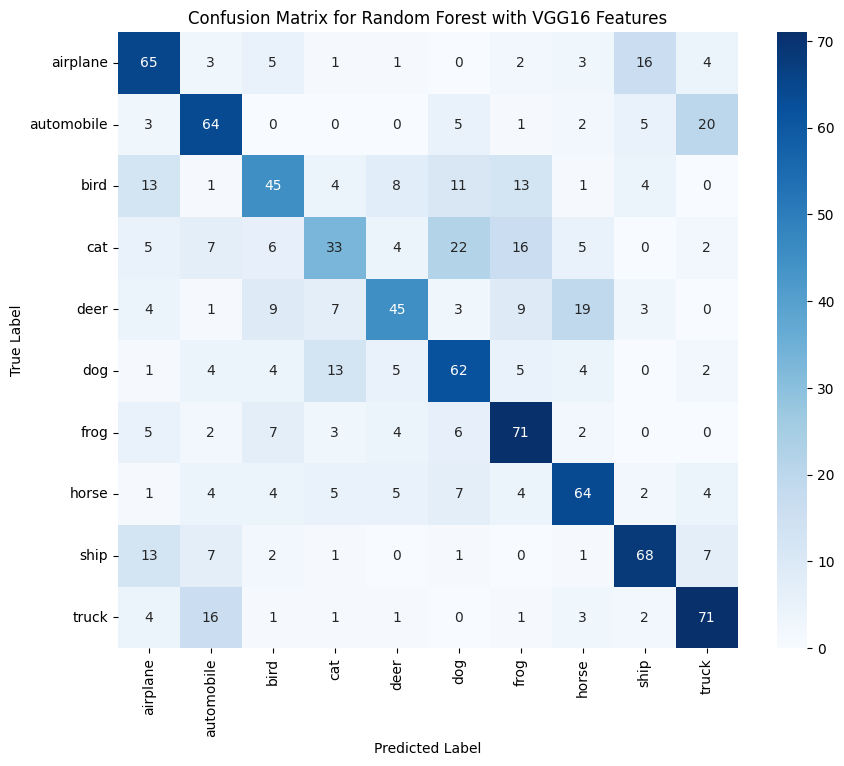

In [8]:
# Encode labels as integers for the model with VGG16 features
label_encoder = LabelEncoder()
labels_train_encoded = label_encoder.fit_transform(labels_train)  # Fit and transform training labels
labels_test_encoded = label_encoder.transform(labels_test)  # Transform test labels

# Initialize and train the Random Forest classifier using extracted features
clf = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf.fit(data_train, labels_train_encoded)  # Train the classifier

# Make predictions
labels_pred = clf.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(labels_test_encoded, labels_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(labels_test_encoded, labels_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with VGG16 Features')
plt.show()

# Process data, train and test basic

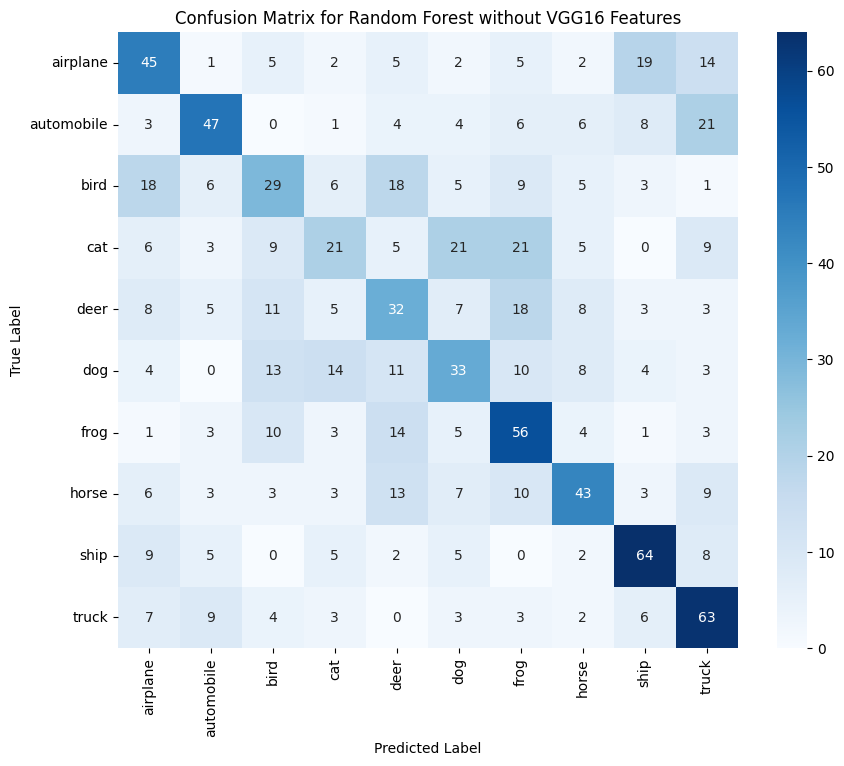

In [9]:
# Encode labels as integers for the model with raw pixel values
label_encoder_basic = LabelEncoder()
labels_train_encoded_basic = label_encoder_basic.fit_transform(labels_train_basic)  # Fit and transform training labels
labels_test_encoded_basic = label_encoder_basic.transform(labels_test_basic)  # Transform test labels

# Initialize and train the Random Forest classifier using raw pixel values
clf_basic = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf_basic.fit(data_train_basic, labels_train_encoded_basic)  # Train the classifier

# Make predictions
labels_pred_basic = clf_basic.predict(data_test_basic)

# Evaluate the model
accuracy_basic = accuracy_score(labels_test_encoded_basic, labels_pred_basic)

# Confusion Matrix
conf_matrix_basic = confusion_matrix(labels_test_encoded_basic, labels_pred_basic)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_basic, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_basic.classes_, yticklabels=label_encoder_basic.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest without VGG16 Features')
plt.show()

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Accuracy_basic: {accuracy_basic:.2f}')

Accuracy: 0.59
Accuracy_basic: 0.43
